In [1]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import timedelta, datetime

In [2]:
df_llms_performance = pd.read_csv("../performance_statistics/overall_statistics.csv")
df_llms_performance.drop_duplicates(keep = 'first', inplace = True) # got one duplicate (due to rerun of the same model) in the dataset
df_llms_performance

,Model,Accuracy,TN,FP,FN,TP,MCC
0,model_albert_base_0.0001_512_dataset_preproces...,0.547451,0,4244,0,5134,0.000000
1,model_albert_base_0.0001_512_dataset_preproces...,0.548198,0,4237,0,5141,0.000000
2,model_albert_base_2e-05_512_dataset_preprocess...,0.734272,2995,1249,1243,3891,0.463648
3,model_albert_base_2e-05_512_dataset_preprocess...,0.700682,2773,1464,1343,3798,0.394364
4,model_albert_base_5e-05_512_dataset_preprocess...,0.547451,0,4244,0,5134,0.000000
5,model_albert_base_5e-05_512_dataset_preprocess...,0.548198,0,4237,0,5141,0.000000
6,model_albert_base_0.0001_256_dataset_preproces...,0.547451,0,4244,0,5134,0.000000
7,model_albert_base_0.0001_256_dataset_preproces...,0.629985,2872,1365,2105,3036,0.267640
8,model_albert_base_2e-05_256_dataset_preprocess...,0.722329,2932,1312,1292,3842,0.439386
9,model_albert_base_2e-05_256_dataset_preprocess...,0.716571,2771,1466,1192,3949,0.425302


In [3]:
def extract_info(df):
    
    df['Modelname'] = df['Model'].apply(lambda x: "_".join(x.split("_")[1:x.split("_").index('dataset') - 2]))
    df['Max_length'] = df['Model'].apply(lambda x: int(x.split("_")[x.split("_").index('dataset') - 1]))
    df['Learning_rate'] = df['Model'].apply(lambda x: float(x.split("_")[x.split("_").index('dataset') - 2]))
    df['Dataset'] = df['Model'].apply(lambda x: "_".join(x.split("_")[x.split("_").index('dataset') + 2:]))

    df.drop('Model', axis=1, inplace=True)
    df.rename(columns={'Accuracy': 'Test Accuracy'}, inplace=True)

    df = df[['Modelname', 'Max_length', 'Learning_rate', 'Dataset', 'Test Accuracy', 'TN', 'FP', 'FN', 'TP', 'MCC']]
    # Return the modified DataFrame
    return df

# Apply the function to your DataFrame
df_llms_performance = extract_info(df_llms_performance.copy())  # Operate on a copy to avoid modifying original data
df_llms_performance.head()

,Modelname,Max_length,Learning_rate,Dataset,Test Accuracy,TN,FP,FN,TP,MCC
0,albert_base,512,0.00010,no_transformation,0.547451,0,4244,0,5134,0.000000
1,albert_base,512,0.00010,stopwords,0.548198,0,4237,0,5141,0.000000
2,albert_base,512,0.00002,no_transformation,0.734272,2995,1249,1243,3891,0.463648
3,albert_base,512,0.00002,stopwords,0.700682,2773,1464,1343,3798,0.394364
4,albert_base,512,0.00005,no_transformation,0.547451,0,4244,0,5134,0.000000


In [4]:
df_timing = pd.DataFrame()

for folder in os.listdir("../performance_statistics/"):
    
    # check if folder
    if not os.path.isdir(f"../performance_statistics/{folder}"):
        continue
    
    for file in os.listdir(f"../performance_statistics/{folder}/"):
        
        if file.endswith(".csv"):
            
            df = pd.read_csv(f"../performance_statistics/{folder}/{file}")
            df['Model'] = folder   
            
            # convert string time to datetime with hours, minutes and seconds
            df['Training_Time'] = df['Training_Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
            df['Validation_Time'] = df['Validation_Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').time())
            
            # concat the dataframes
            df_timing = pd.concat([df_timing, df], ignore_index=True)

In [5]:
# Convert time strings to timedeltas
df_timing['Training_Time'] = df_timing['Training_Time'].apply(lambda x: timedelta(hours=x.hour, minutes=x.minute, seconds=x.second))
df_timing['Validation_Time'] = df_timing['Validation_Time'].apply(lambda x: timedelta(hours=x.hour, minutes=x.minute, seconds=x.second))

In [6]:
df2 = df_timing.groupby('Model').agg({'Training_Time' : 'mean', 'Validation_Time' : 'mean'}).reset_index()
df2['Avg_Training_Time'] = df2['Training_Time'].apply(lambda x: f"{x.seconds//60}m {x.seconds%60}s")
df2['Avg_Validation_Time'] = df2['Validation_Time'].apply(lambda x: f"{x.seconds//60}m {x.seconds%60}s")
df2.drop(['Training_Time', 'Validation_Time'], axis=1, inplace=True)
df2

,Model,Avg_Training_Time,Avg_Validation_Time
0,albert_base,17m 41s,3m 12s
1,bert_base,17m 58s,2m 47s
2,distilbert,9m 20s,1m 25s
3,roberta,18m 7s,2m 43s
4,transformer,16m 14s,2m 26s


## Grouping the Dataframe

In [7]:
df_llms_performance['Precision'] = df_llms_performance['TP'] / (df_llms_performance['TP'] + df_llms_performance['FP'])
df_llms_performance['Recall'] = df_llms_performance['TP'] / (df_llms_performance['TP'] + df_llms_performance['FN'])

In [8]:
df_llms_performance.groupby(['Dataset', 'Max_length', 'Learning_rate', 'Modelname'])[['Test Accuracy', 'Precision', 'Recall', 'MCC']].mean()

Test Accuracy  \
Dataset           Max_length Learning_rate Modelname                    
no_transformation 256        0.00002       albert_base       0.722329   
                                           bert_base         0.796012   
                                           distilbert        0.781083   
                                           roberta           0.796225   
                                           transformer       0.700363   
                             0.00005       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.741309   
                                           roberta           0.547451   
                                           transformer       0.547451   
                             0.00010       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.547451   
                                           roberta           0.547451   
                                           transformer       0.547451   
                  512        0.00002       albert_base       0.734272   
                                           bert_base         0.799851   
                                           distilbert        0.781830   
                                           roberta           0.806569   
                                           transformer       0.818511   
                             0.00005       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.735125   
                                           roberta           0.547451   
                                           transformer       0.547451   
                             0.00010       albert_base       0.547451   
                                           bert_base         0.547451   
                                           distilbert        0.547451   
                                           roberta           0.547451   
                                           transformer       0.547451   
stopwords         256        0.00002       albert_base       0.716571   
                                           bert_base         0.745468   
                                           distilbert        0.746534   
                                           roberta           0.746961   
                                           transformer       0.548198   
                             0.00005       albert_base       0.716038   
                                           bert_base         0.548198   
                                           distilbert        0.723928   
                                           roberta           0.548198   
                                           transformer       0.548198   
                             0.00010       albert_base       0.629985   
                                           bert_base         0.548198   
                                           distilbert        0.548198   
                                           roberta           0.548198   
                                           transformer       0.548198   
                  512        0.00002       albert_base       0.700682   
                                           bert_base         0.751120   
                                           distilbert        0.749200   
                                           roberta           0.744615   
                                           transformer       0.548198   
                             0.00005       albert_base       0.548198   
                                           bert_base         0.548198   
                                           distilbert        0.724142   
                                         

## Extracting best Models

In [9]:
df_llms_performance = df_llms_performance.sort_values(by = 'Test Accuracy', ascending = False)
df_llms_performance = df_llms_performance[0:5]
df_llms_performance

,Modelname,Max_length,Learning_rate,Dataset,Test Accuracy,TN,FP,FN,TP,MCC,Precision,Recall
49,transformer,512,0.00002,no_transformation,0.818511,3357,887,815,4319,0.633261,0.829620,0.841254
37,roberta,512,0.00002,no_transformation,0.806569,3251,993,821,4313,0.608665,0.812853,0.840086
13,bert_base,512,0.00002,no_transformation,0.799851,3255,989,888,4246,0.595370,0.811079,0.827035
46,roberta,256,0.00002,no_transformation,0.796225,3151,1093,818,4316,0.587465,0.797929,0.840670
19,bert_base,256,0.00002,no_transformation,0.796012,3208,1036,877,4257,0.587321,0.804270,0.829178


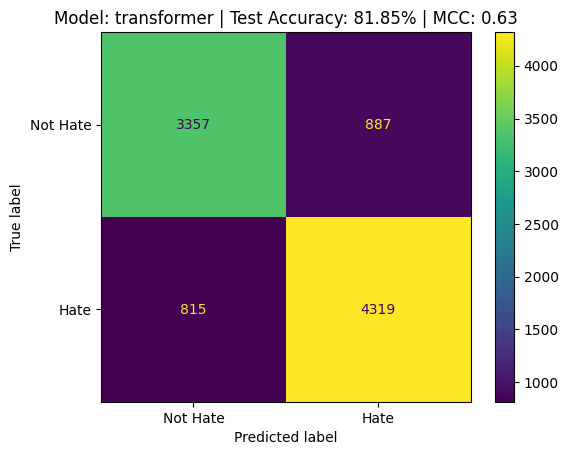

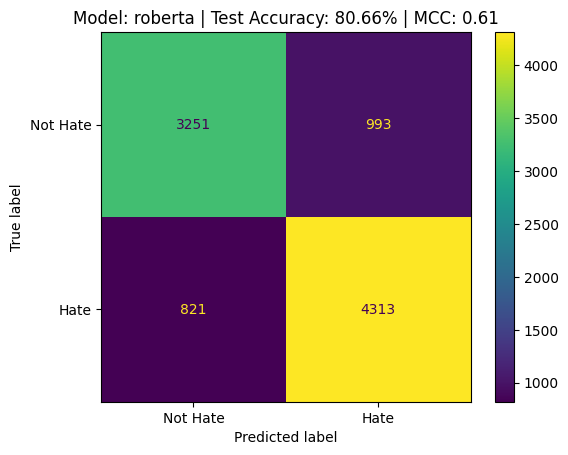

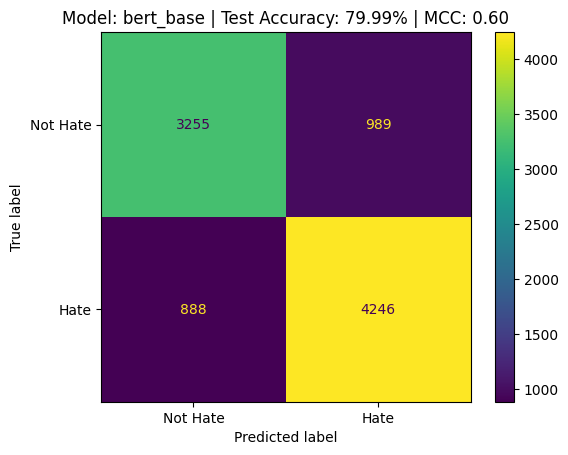

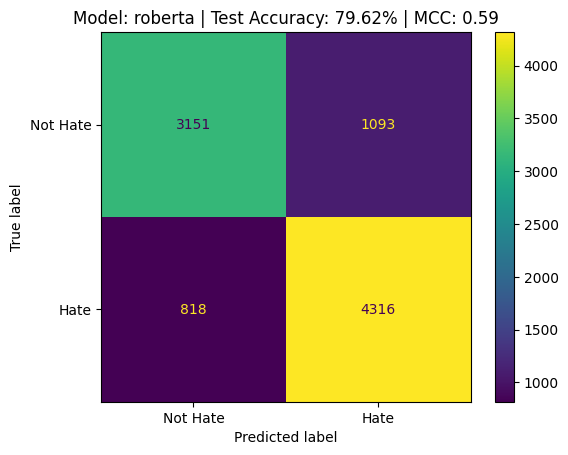

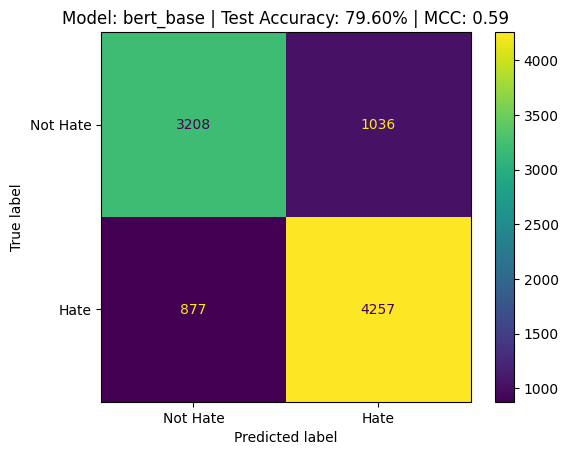

In [10]:
for row in df_llms_performance.iterrows():
    
    TN = row[1]['TN']
    FP = row[1]['FP']
    FN = row[1]['FN']
    TP = row[1]['TP']
    
    test_accuracy = row[1]['Test Accuracy'] * 100

    # Print the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = np.array([[TN, FP], [FN, TP]]), display_labels= ['Not Hate', 'Hate'])

    # Create the figure and axes
    disp.plot()
    # Set the suptitle (main title above the plot)
    plt.title(f"Model: {row[1]['Modelname']} | Test Accuracy: {test_accuracy:.2f}% | MCC: {row[1]['MCC']:.2f}")
    plt.show()